In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["WANDB_DISABLED"] = "true"

import sys
# sys.path = ['/home/jxm3/research/retrieval/inversion'] + sys.path
sys.path = [
    p for p in sys.path
    if p not in ['/home/jxm3/research/prompting/imodelsX', '/home/jxm3/research/prompting/tree-prompt']
]
sys.path.append('/home/jxm3/research/retrieval/inversion')

In [2]:
import aliases

trainer = aliases.load_inversion_trainer_from_alias("gtr_nq__msl128_beta")

loading alias gtr_nq__msl128_beta from /home/jxm3/research/retrieval/inversion/saves/8631b1c05efebde3077d16c5b99f6d5e/dc72e8b9c01bd27b0ed1c2def90bcee5...
Set train_args.dataloader_num_workers = 4


/home/jxm3/.conda/envs/torch/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[nltk_data] Downloading package wordnet to /home/jxm3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jxm3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jxm3/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


================ Begin trainer sanity check ================
	Input to encode -> Twas brillig, and the slithy toves, Did gyre and gimble in the wabe, All mimsy were the borogoves, And the mome raths outgrabe.
	Decoded output shape ->  torch.Size([1, 128])
	Decoded output -> The sloes, the snags, and the wybies were the motte, the tobbies, The wavy slags, And the gybes, were the martyres, But the tybe was the nags and the martes, And all the bluffs, blies, and bliths were wry. The mesty came to the ring, And sighed, And sang, And came to writhe, And
================ End trainer sanity check ================


In [32]:
import torch
counts = torch.zeros((129,), dtype=torch.long)

def count_stuff(batch):
    global counts
    lengths = 128 - (torch.tensor(batch['input_ids']) == 0).sum(1)
    counts += lengths.bincount(minlength=128)
    return None

trainer.train_dataset.select(range(5*10**5)).map(count_stuff, batched=True, batch_size=8192)

Map:   0%|          | 0/500000 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'attention_mask', 'labels', 'embedder_input_ids', 'embedder_attention_mask', 'idx'],
    num_rows: 500000
})

In [33]:
counts

tensor([     0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      2,      0,      1,
             5,      8,     38,     42, 

Text(0.5, 1.0, 'lengths of sequences (truncated to 128)')

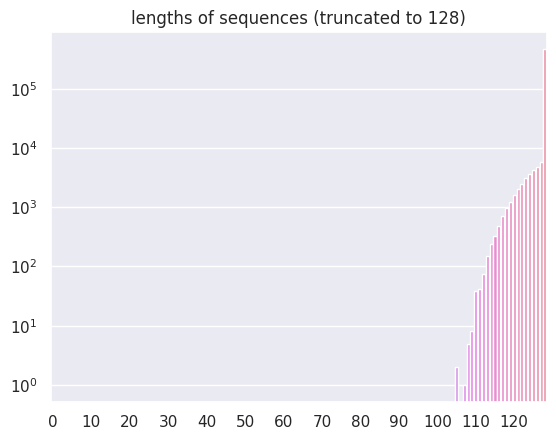

In [28]:
import seaborn as sns
import pandas as pd


ax = sns.barplot(x=list(range(len(counts))), y=counts.tolist())
ax.set_yscale('log')

# limit xtick labels:
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

ax.set_title('lengths of sequences (truncated to 128)')

In [30]:
counts[-1]/counts.sum() # 93.6% are of length 128.

tensor(0.9360)

In [ ]:
# TODO: Check if hypothesis input IDs are correctly different lengths...